In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
from tqdm import tqdm

In [2]:
# Enregistrement des images
def save_embeddings(epoch, input_embeddings):
    plt.figure()
    for i, word in idx2word.items():
        plt.scatter(input_embeddings[i, 0], 0)
        plt.text(input_embeddings[i, 0], 0, word)
    plt.axis('off')
    plt.title(f"Epoch: {epoch}")
    plt.savefig(f"epoch_{epoch}.png")
    plt.close()

filenames = []

In [3]:
corpus = ["Bonjour tout Paris", "Bonjour tout Londres", "Bonjour tout Pau", "Bonjour tout Istanbul"]
window_size = 1
embedding_dim = 1
epochs =  250 # Modifiable selon les besoins
learning_rate = 0.01
np.random.seed(41)

In [4]:
# Préparation des données
words = set(" ".join(corpus).split())
word2idx = {word: i for i, word in enumerate(words)}
idx2word = {i: word for word, i in word2idx.items()}

In [5]:
# Création des paires de mots unidirectionnels
word_pairs = []
for sentence in corpus:
    tokens = sentence.split()
    for i, center_word in enumerate(tokens):
        for j in range(1, window_size + 1):
            if i + j < len(tokens):
                word_pairs.append((word2idx[center_word], word2idx[tokens[i + j]]))

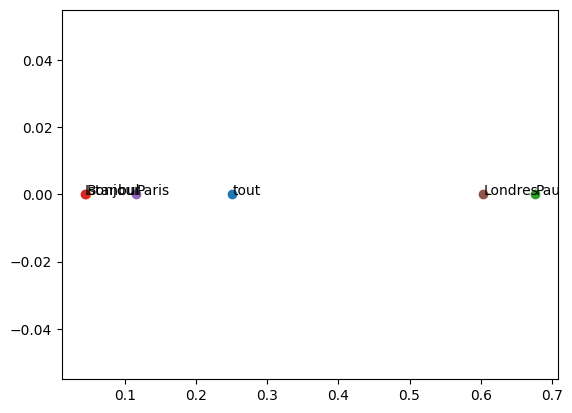

In [6]:
# Initialisation des embeddings
input_embeddings = np.random.rand(len(words), embedding_dim)

losss = []

for i, word in idx2word.items():
    plt.scatter(input_embeddings[i, 0], 0)
    plt.text(input_embeddings[i, 0], 0, word)

plt.show()

  0%|          | 0/250 [00:00<?, ?it/s]<ipython-input-7-5e93ddd479a7>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
100%|██████████| 250/250 [00:15<00:00, 16.46it/s]


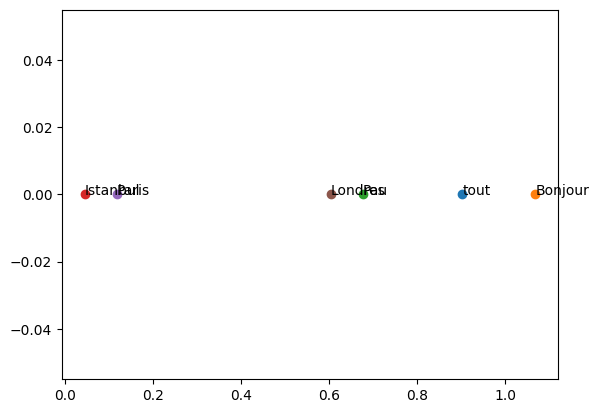

In [7]:
# Boucle d'entraînement
for epoch in tqdm(range(epochs)):
    total_loss = 0
    for center, context in word_pairs:
        center_embedding = input_embeddings[center]
        context_embedding = input_embeddings[context]

        # Calcul du score
        score = np.dot(center_embedding, context_embedding)

        # Calcul de la fonction de coût et du gradient
        loss = -np.log(np.exp(score) / np.sum(np.exp(np.dot(input_embeddings, context_embedding))))
        gradient = -np.exp(score) / np.sum(np.exp(np.dot(input_embeddings, context_embedding))) * context_embedding

        # Mise à jour des embeddings
        input_embeddings[center] -= learning_rate * gradient

        total_loss += loss
    losss.append(total_loss)

    save_embeddings(epoch, input_embeddings)
    filenames.append(f"epoch_{epoch}.png")

# Création du GIF
with imageio.get_writer('embeddings_evolution.gif', mode='I') as writer:
    for filename in tqdm(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

# Suppression des images intermédiaires
import os
for filename in filenames:
    os.remove(filename)

for i, word in idx2word.items():
    plt.scatter(input_embeddings[i, 0], 0)
    plt.text(input_embeddings[i, 0], 0, word)

plt.show()

Text(0.5, 1.0, 'Fonction de perte')

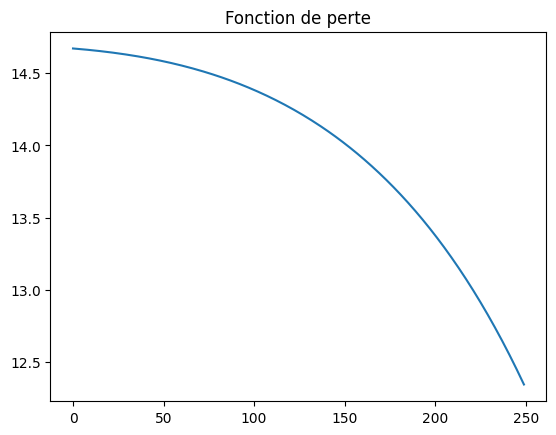

In [8]:
plt.plot(range(len(losss)), losss)
plt.title("Fonction de perte")